In [29]:
top_n_list = [1, 3, 5, 8, 10, 15]

model_collection = {k: v for k, v in info_stage2.model_collection.items()}
df_list = []
for top_n in top_n_list:
    df = mapping_routine.prep_weighted_average_df_new(
        model_collection=model_collection, top_num=top_n
    )
    df_list.append(df)

2022-12-19 14:36:01.383 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - BLUEBERT-EFO
2022-12-19 14:36:02.079 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - BioBERT
2022-12-19 14:36:02.867 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - BioSentVec
2022-12-19 14:36:03.470 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - BlueBERT
2022-12-19 14:36:04.051 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - GUSE
2022-12-19 14:36:04.640 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - Spacy
2022-12-19 14:36:05.216 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - SciSpacy
2022-12-19 14:36:05.881 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - Zooma
2022-12-19 14:36:06.297 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_df:140 - Levenshtein
2022-12-19 14:36:06.840 | INFO     | funcs.data_processing.mapping_routine:_calc_wa_

In [30]:
df_x = []
for idx, top_n in enumerate(top_n_list):
    df = (
        df_list[idx]
        .groupby(["Model"])
        .apply(lambda df: pd.Series({"value": df["value"].sum() / len(df)}))
        .assign(top_n=top_n)
    )
    df_x.append(df)
df_x = pd.concat(df_x).reset_index(drop=False).rename(columns={"Model": "Method"})
df_x

,Method,value,top_n
0,BLUEBERT-EFO,0.694458,1
1,BioBERT,0.590461,1
2,BioSentVec,0.631194,1
3,BlueBERT,0.572683,1
4,GUSE,0.553148,1
5,Levenshtein,0.481168,1
6,SciSpacy,0.620183,1
7,Spacy,0.550547,1
8,Zooma,0.569365,1
9,BLUEBERT-EFO,0.634671,3


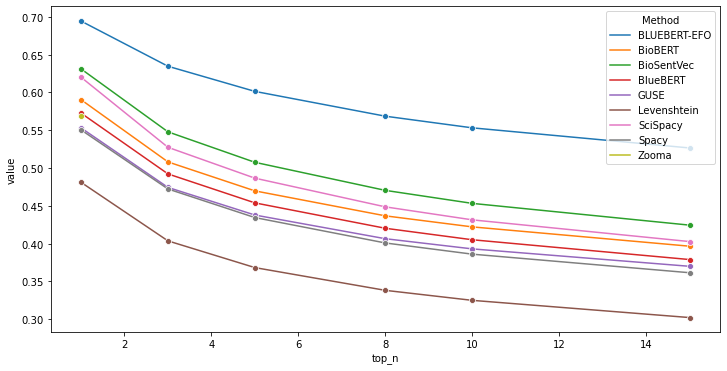

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_x, x="top_n", y="value", hue="Method", marker="o")

output_file = output_dir / "wa-line-all.png"
plt.savefig(output_file, dpi=1000)